c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


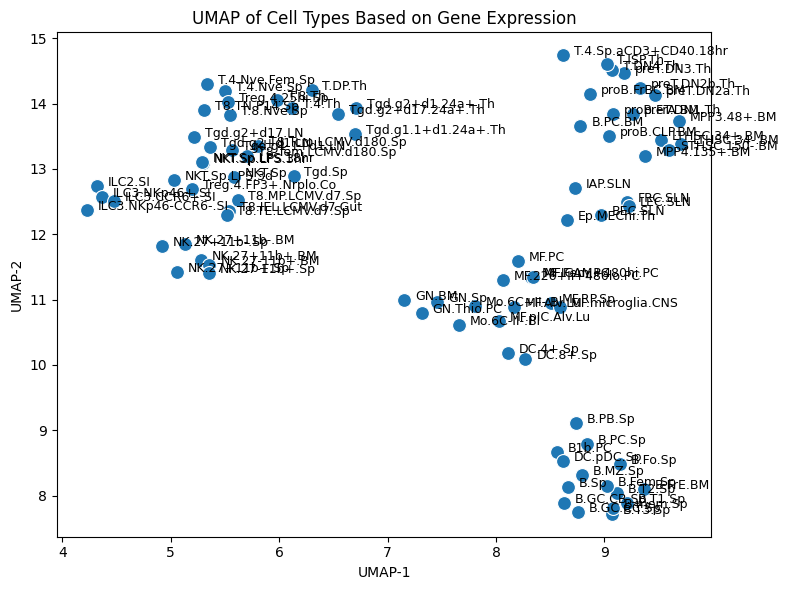

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

RNA_seq_path=r"C:\Users\helen\Downloads\datasets\mmc2.csv"
RNA_seq=pd.read_csv(RNA_seq_path,index_col=0)
RNA_seq_T=RNA_seq.T

RNA_seq_log = np.log1p(RNA_seq_T)  

scaler = StandardScaler()
RNA_seq_scaled = scaler.fit_transform(RNA_seq_log)

reducer = umap.UMAP(random_state=42)
umap_RNA_prep= reducer.fit_transform(RNA_seq_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_RNA_prep[:, 0], y=umap_RNA_prep[:, 1], s=100)


for i, label in enumerate(RNA_seq_T.index):
    plt.text(umap_RNA_prep[i, 0]+0.1, umap_RNA_prep[i, 1], label, fontsize=9)

plt.title("UMAP of Cell Types Based on Gene Expression")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

Now that we have our UMAP we will perform and compare the elbow and silhouette method to determine the optimal amount of clusters for kmeans clustering

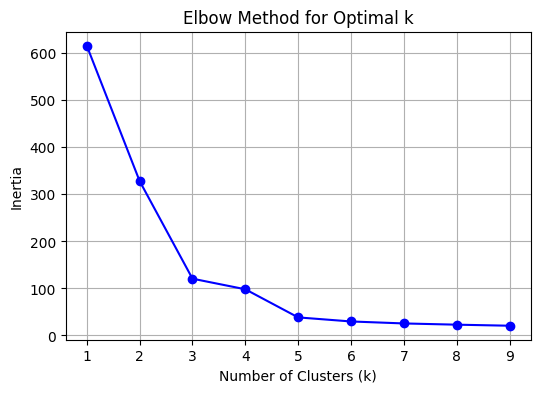

In [5]:
#elbow method to determine amount of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(umap_RNA_prep)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

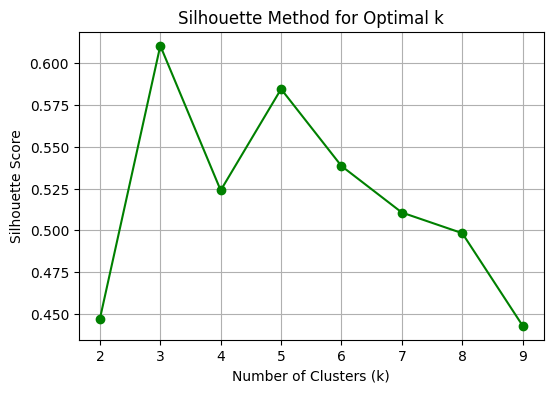

In [6]:
#test silhouette sore for kmeans clusterin
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):  # must be ≥2
    kmeans = KMeans(n_clusters=k, random_state=42).fit(umap_RNA_prep)
    labels = kmeans.labels_
    score = silhouette_score(umap_RNA_prep, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

-> 3 and 5 both seem to be a good number of clusters, as they both show elbows in the elbow method and have local peaks in their silhouette score. This might signify that cells can be divided into 3 main groups that can be further divided into 5 subgroups

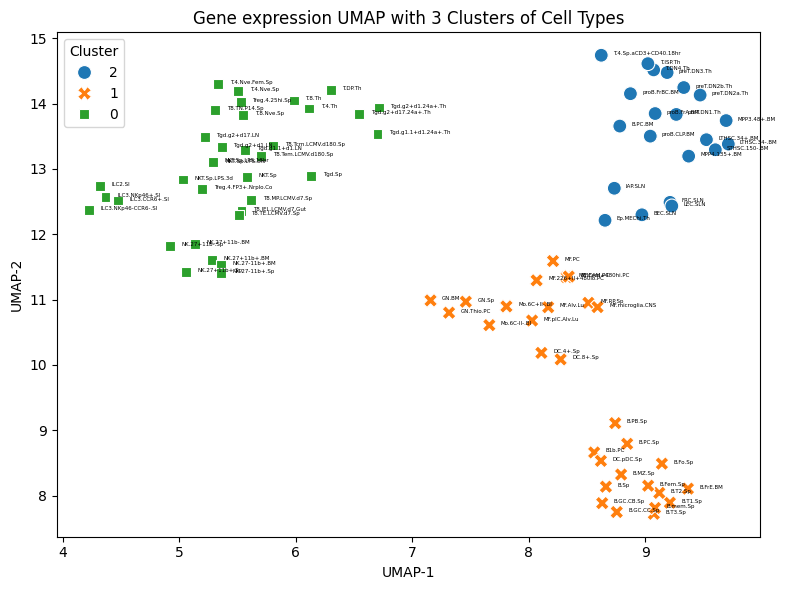

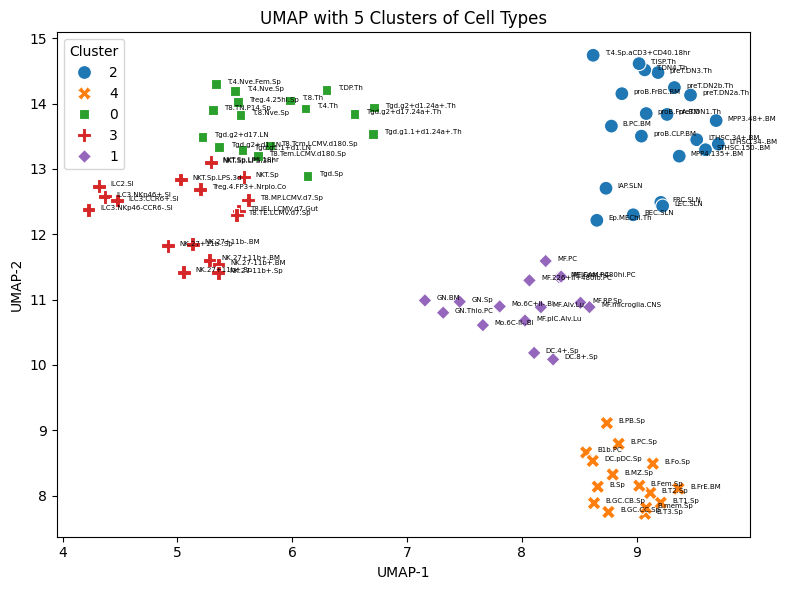

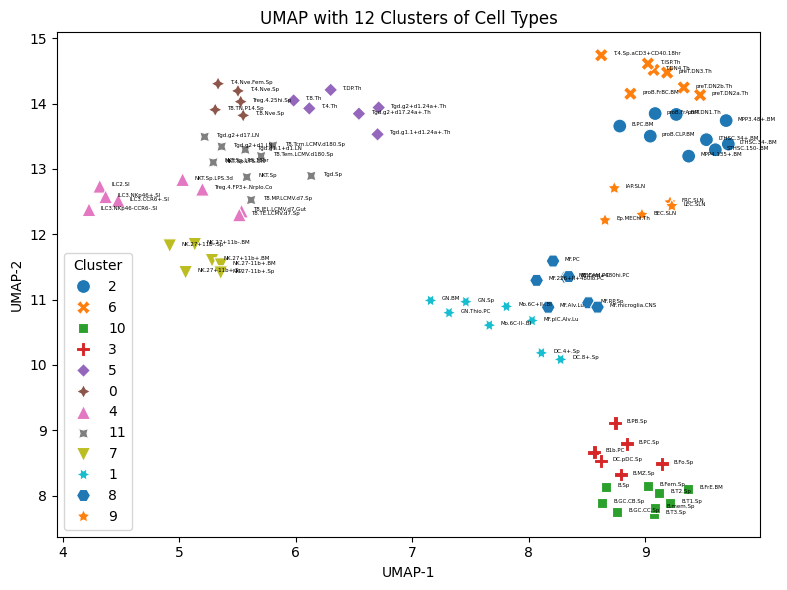


KMeans Clustering Summary (k=3):


,kmeans3,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."
2,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."



KMeans Clustering Summary (k=5):


,kmeans5,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
2,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
3,3,"[Treg.4.FP3+.Nrplo.Co, T8.IEL.LCMV.d7.Gut, T8...."
4,4,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."



KMeans Clustering Summary (k=12):


,kmeans12,CellType
0,0,"[T.4.Nve.Sp, T.4.Nve.Fem.Sp, T.8.Nve.Sp, Treg...."
1,1,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
2,10,"[B.FrE.BM, B.T1.Sp, B.T2.Sp, B.T3.Sp, B.Sp, B...."
3,11,"[T8.MP.LCMV.d7.Sp, T8.Tcm.LCMV.d180.Sp, T8.Tem..."
4,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
5,3,"[B1b.PC, B.MZ.Sp, B.Fo.Sp, B.PB.Sp, B.PC.Sp, D..."
6,4,"[Treg.4.FP3+.Nrplo.Co, T8.IEL.LCMV.d7.Gut, T8...."
7,5,"[T.DP.Th, T.4.Th, T.8.Th, Tgd.g2+d17.24a+.Th, ..."
8,6,"[proB.FrBC.BM, preT.DN2a.Th, preT.DN2b.Th, pre..."
9,7,"[NK.27+11b-.BM, NK.27+11b+.BM, NK.27-11b+.BM, ..."


In [7]:
from sklearn.cluster import KMeans

# Prepare DataFrame
umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_log.index)
umap_RNA_seq["CellType"] = RNA_seq_log.index

# kmeans with 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42)
umap_RNA_seq["kmeans3"] = kmeans3.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans3", style="kmeans3", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=4)

plt.title("Gene expression UMAP with 3 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# kmeans with 5 clusters
kmeans5 = KMeans(n_clusters=5, random_state=42)
umap_RNA_seq["kmeans5"] = kmeans5.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans5", style="kmeans5", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=5)

plt.title("UMAP with 5 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# kmeans with 12 clusters (amount cell types)
kmeans12 = KMeans(n_clusters=12, random_state=42)
umap_RNA_seq["kmeans12"] = kmeans12.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans12", style="kmeans12", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=4)

plt.title("UMAP with 12 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# table view of cell types
for k in [3, 5, 12]:
    cluster_col = f"kmeans{k}"
    kmeans_summary = umap_RNA_seq.groupby(cluster_col)["CellType"].apply(list).reset_index()
    print(f"\nKMeans Clustering Summary (k={k}):")
    display(kmeans_summary)


now we will perform leiden clustering to see how it compares

In [8]:
RNA_seq.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0610005C13Rik,1.096732,1.096732,1.021750,1.021812,1.205236,1.326780,1.392996,1.821243,1.025543,3.383058,...,1.025785,1.025785,1.251082,1.147249,1.024462,1.019656,1.017884,1.019107,1.017884,1.024720
0610007P14Rik,206.053987,246.105317,192.424636,204.298358,189.759175,210.195155,180.219440,137.802543,139.436719,138.334965,...,121.603448,105.140895,101.841463,175.620707,280.406964,200.228029,208.171821,88.578590,129.021874,140.655763
0610009B22Rik,78.272059,78.837030,68.844751,76.418169,106.085619,77.502817,68.213092,57.224426,56.787489,40.460507,...,88.691426,73.423656,68.881268,60.811907,56.578015,100.397766,37.373080,73.888468,77.191831,84.245816
0610009L18Rik,8.577159,16.791386,15.511549,16.947354,10.583704,8.664784,2.878172,8.952120,11.873984,16.721968,...,6.132818,8.965889,4.080445,11.987408,5.627219,4.227673,2.199352,1.460090,2.482516,1.023995
0610009O20Rik,168.645852,157.926022,155.941641,186.261464,162.584556,152.088002,163.072291,133.116083,88.052982,87.408479,...,102.592399,147.139323,130.924354,107.542142,88.338330,100.779150,86.442408,193.307175,187.212720,45.464889


c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\helen\AppData\Local\Temp\ipykernel_65076\932013751.py:22: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.9)


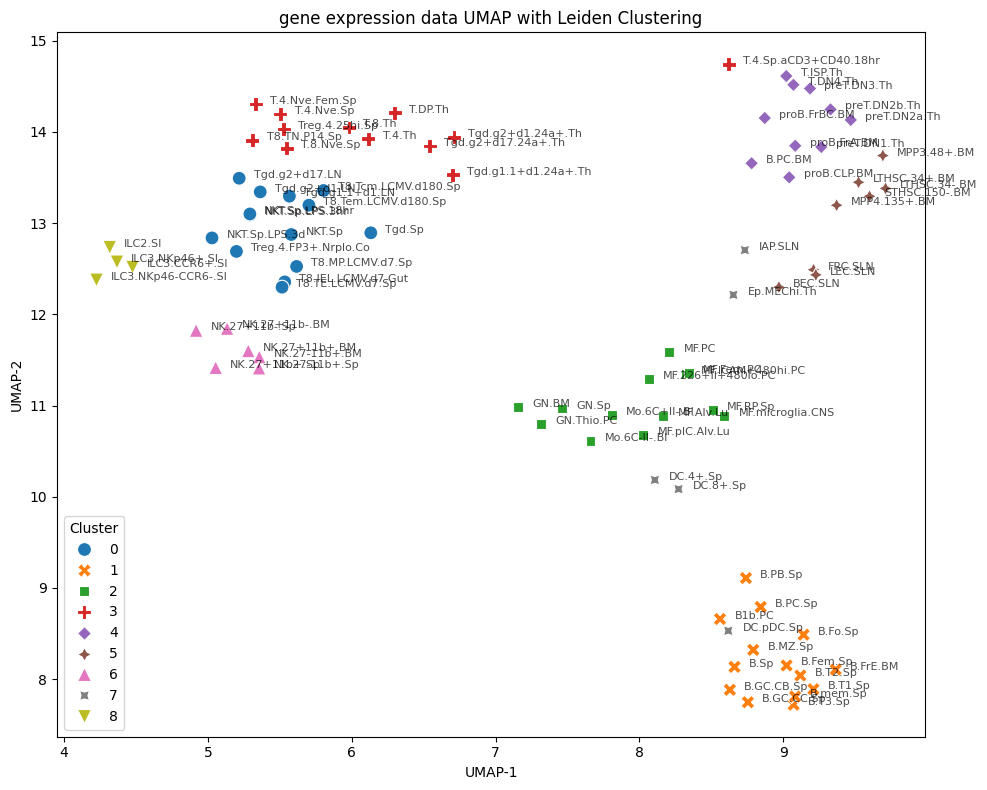

In [9]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_log.index)
adata = ad.AnnData(X=RNA_seq_log.values)
adata.obs_names = RNA_seq_log.index
adata.obsm["X_umap"] = umap_RNA_prep
adata.var_names= RNA_seq_log.columns

scaler = StandardScaler()
RNA_scaled = scaler.fit_transform(RNA_seq_log)
umap_model = umap.UMAP(random_state=42)
umap_result = umap_model.fit_transform(RNA_scaled)
adata.obsm['X_umap'] = umap_result

sc.pp.neighbors(adata, use_rep="X", n_neighbors=10, random_state=42)
sc.tl.leiden(adata, resolution=1.9)

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].values
umap_RNA_seq["Leiden_Cluster"].to_csv("leiden_clusters.csv")


plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=umap_RNA_seq, x="UMAP1", y="UMAP2",
    hue="Leiden_Cluster", style="Leiden_Cluster",
    s=100, palette="tab10"
)
for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row.name, fontsize=8, alpha=0.7)

plt.title("gene expression data UMAP with Leiden Clustering")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

we will visualize grouped cell types in a table and countplot


Cluster 0:
  - Treg.4.FP3+.Nrplo.Co
  - T8.IEL.LCMV.d7.Gut
  - T8.TE.LCMV.d7.Sp
  - T8.MP.LCMV.d7.Sp
  - T8.Tcm.LCMV.d180.Sp
  - T8.Tem.LCMV.d180.Sp
  - NKT.Sp
  - NKT.Sp.LPS.3hr
  - NKT.Sp.LPS.18hr
  - NKT.Sp.LPS.3d
  - Tgd.g2+d17.LN
  - Tgd.g2+d1.LN
  - Tgd.g1.1+d1.LN
  - Tgd.Sp

Cluster 1:
  - B.FrE.BM
  - B1b.PC
  - B.T1.Sp
  - B.T2.Sp
  - B.T3.Sp
  - B.Sp
  - B.Fem.Sp
  - B.MZ.Sp
  - B.Fo.Sp
  - B.mem.Sp
  - B.GC.CB.Sp
  - B.GC.CC.Sp
  - B.PB.Sp
  - B.PC.Sp

Cluster 2:
  - GN.BM
  - GN.Sp
  - GN.Thio.PC
  - Mo.6C+II-.Bl
  - Mo.6C-II-.Bl
  - MF.pIC.Alv.Lu
  - MF.226+II+480lo.PC
  - MF.ICAM+480hi.PC
  - MF.RP.Sp
  - MF.Alv.Lu
  - MF.microglia.CNS
  - MF.PC
  - MF.Fem.PC

Cluster 3:
  - T.DP.Th
  - T.4.Th
  - T.8.Th
  - T.4.Nve.Sp
  - T.4.Nve.Fem.Sp
  - T.8.Nve.Sp
  - T.4.Sp.aCD3+CD40.18hr
  - Treg.4.25hi.Sp
  - T8.TN.P14.Sp
  - Tgd.g2+d17.24a+.Th
  - Tgd.g2+d1.24a+.Th
  - Tgd.g1.1+d1.24a+.Th

Cluster 4:
  - proB.CLP.BM
  - proB.FrA.BM
  - proB.FrBC.BM
  - B.PC.BM
  - preT.DN1.Th
  

C:\Users\helen\AppData\Local\Temp\ipykernel_65076\933239843.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))
C:\Users\helen\AppData\Local\Temp\ipykernel_65076\933239843.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))
C:\Users\helen\AppData\Local\Temp\ipykernel_65076\933239843.py:17: FutureWarning: 

Passing `pal

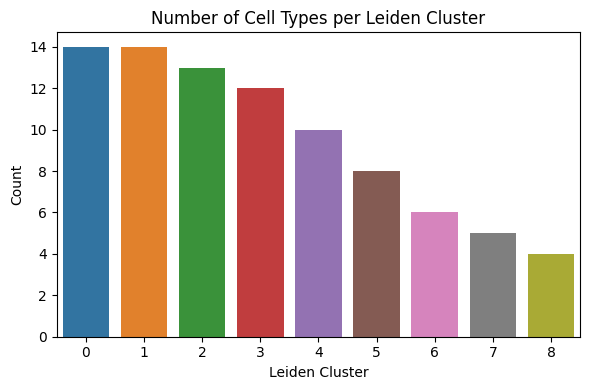


Leiden Clustering Summary:


,Leiden_Cluster,CellType
0,0,"[Treg.4.FP3+.Nrplo.Co, T8.IEL.LCMV.d7.Gut, T8...."
1,1,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."
2,2,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
3,3,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
4,4,"[proB.CLP.BM, proB.FrA.BM, proB.FrBC.BM, B.PC...."
5,5,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
6,6,"[NK.27+11b-.BM, NK.27+11b+.BM, NK.27-11b+.BM, ..."
7,7,"[DC.4+.Sp, DC.8+.Sp, DC.pDC.Sp, IAP.SLN, Ep.ME..."
8,8,"[ILC2.SI, ILC3.NKp46-CCR6-.SI, ILC3.NKp46+.SI,..."


In [10]:

leiden_col = "Leiden_Cluster"
if leiden_col not in umap_RNA_seq.columns:
    umap_RNA_seq[leiden_col] = adata.obs["leiden"].values

# Add CellType column if missing
if "CellType" not in umap_RNA_seq.columns:
    umap_RNA_seq["CellType"] = umap_RNA_seq.index

clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))

for cluster, cells in clustered_cell_types.items():
    print(f"\nCluster {cluster}:")
    for cell in cells:
        print(f"  - {cell}")

plt.figure(figsize=(6, 4))
sns.countplot(x=leiden_col, data=umap_RNA_seq, palette="tab10")
plt.title("Number of Cell Types per Leiden Cluster")
plt.xlabel("Leiden Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].astype(str).reindex(umap_RNA_seq.index)
leiden_summary = umap_RNA_seq.groupby(leiden_col)["CellType"].apply(list).reset_index()
print("\nLeiden Clustering Summary:")
display(leiden_summary)


now we will correlate leiden/kmeans clusters with their celltype/ lineage

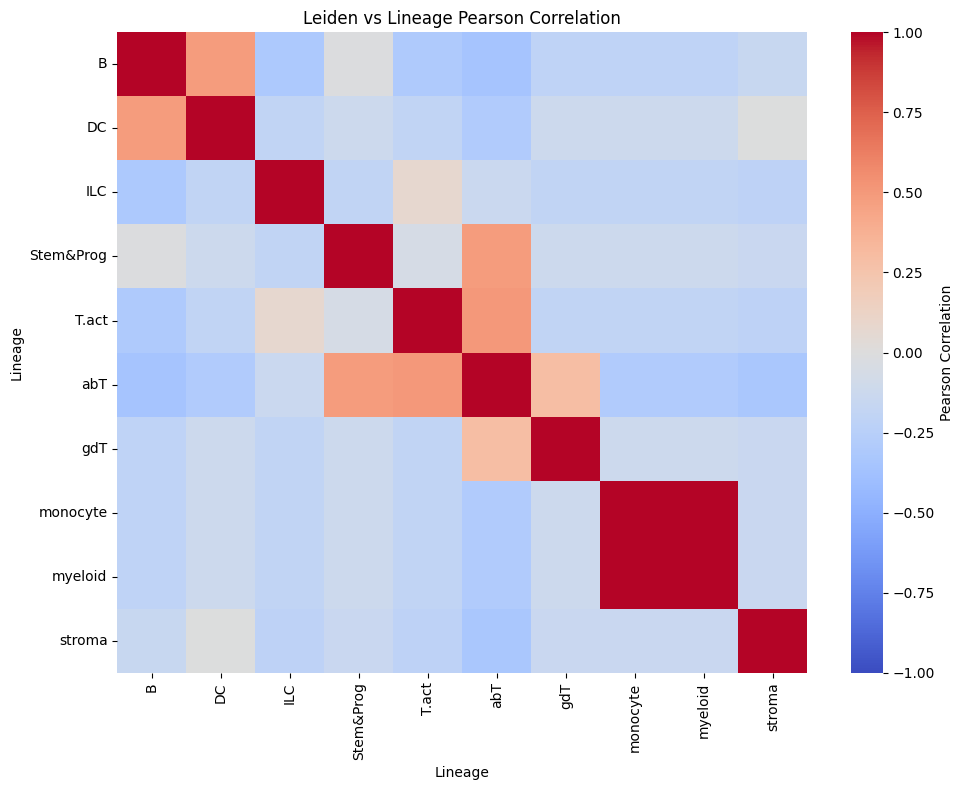

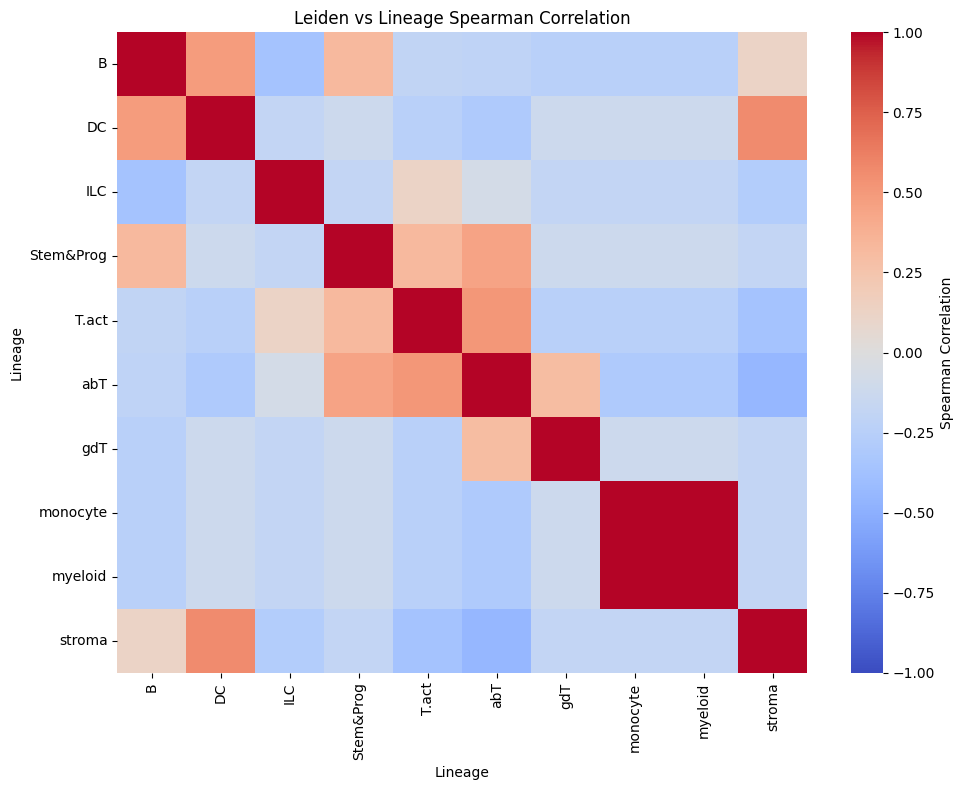

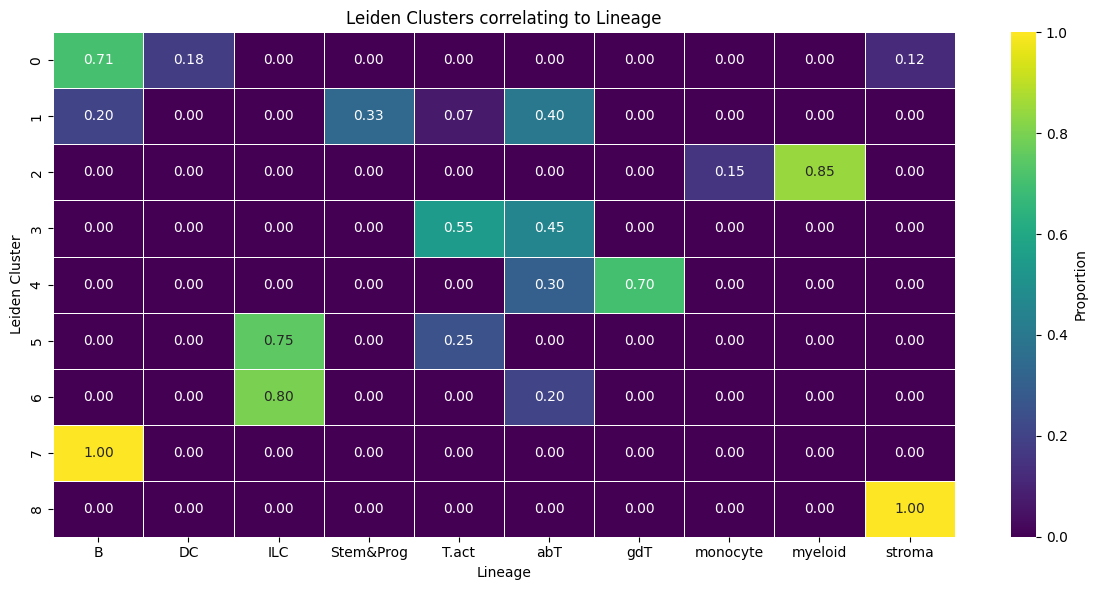

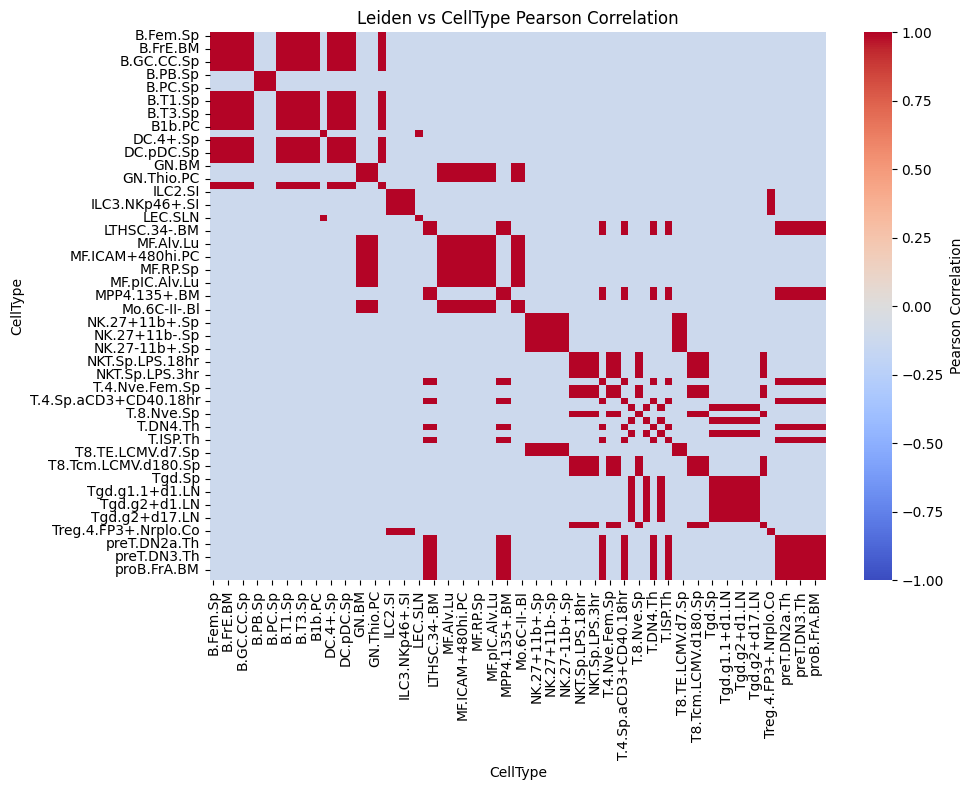

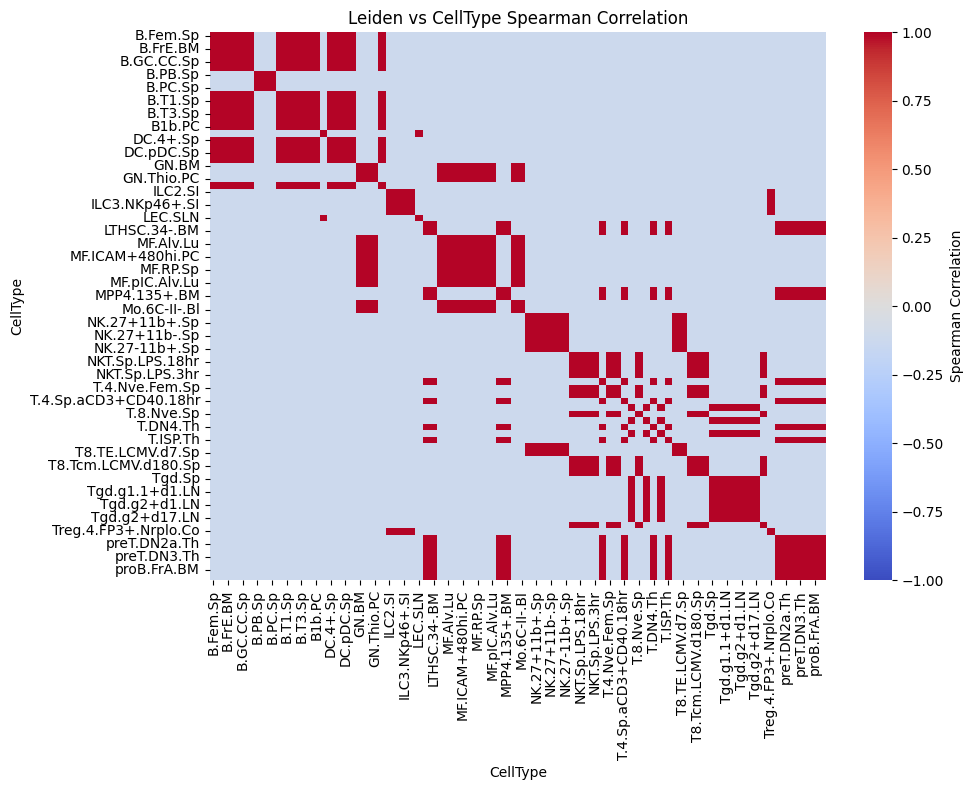

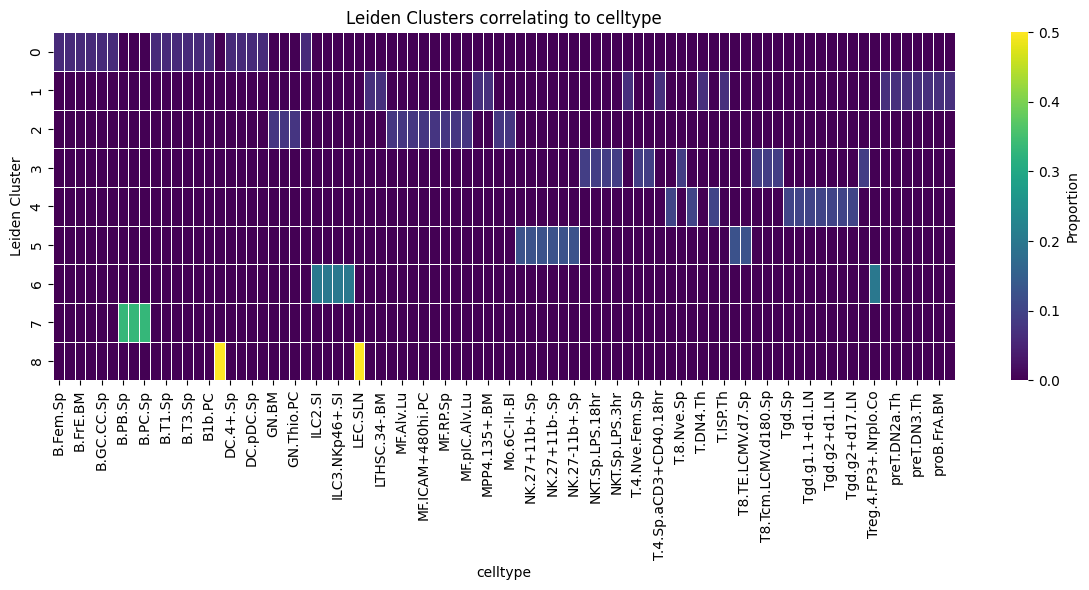

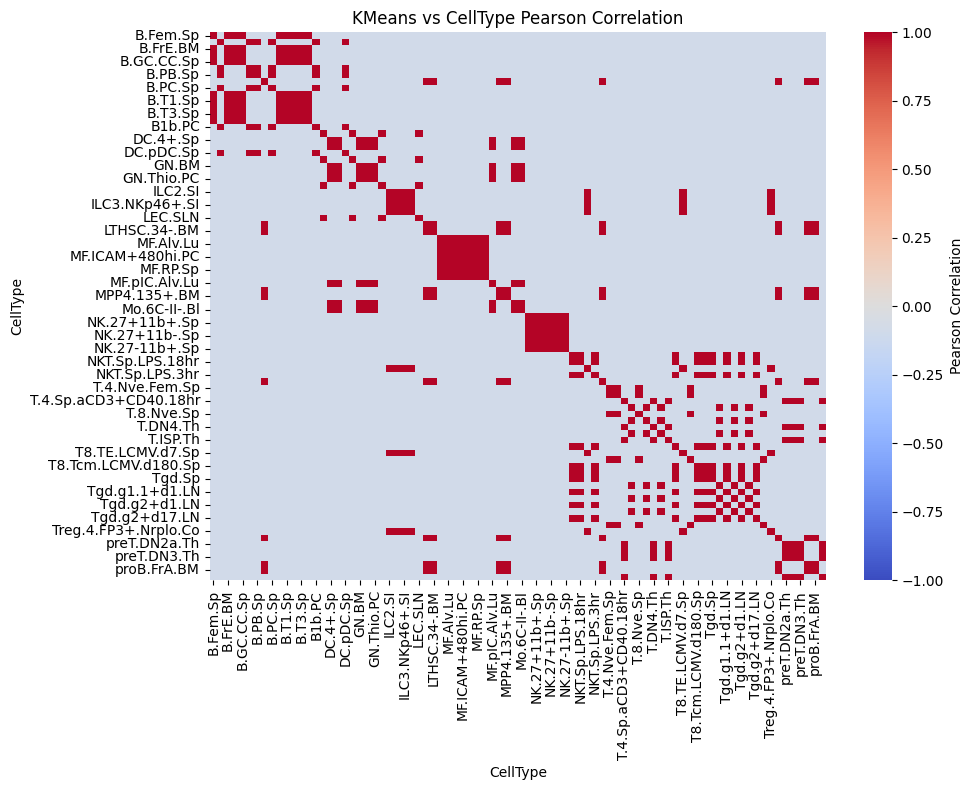

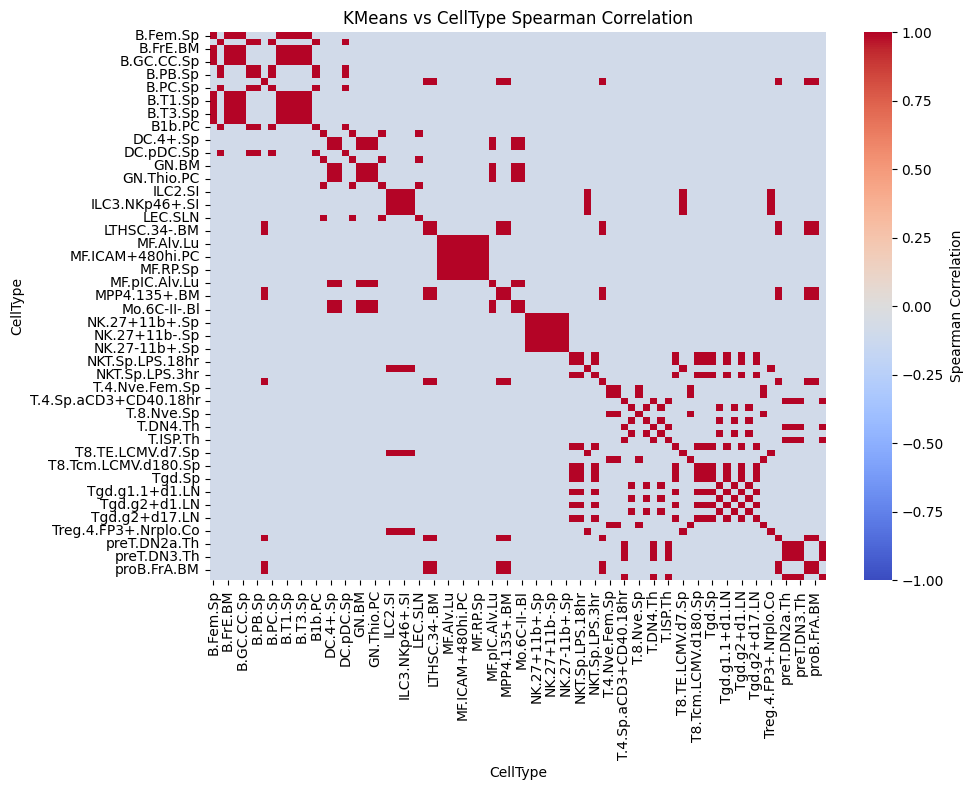

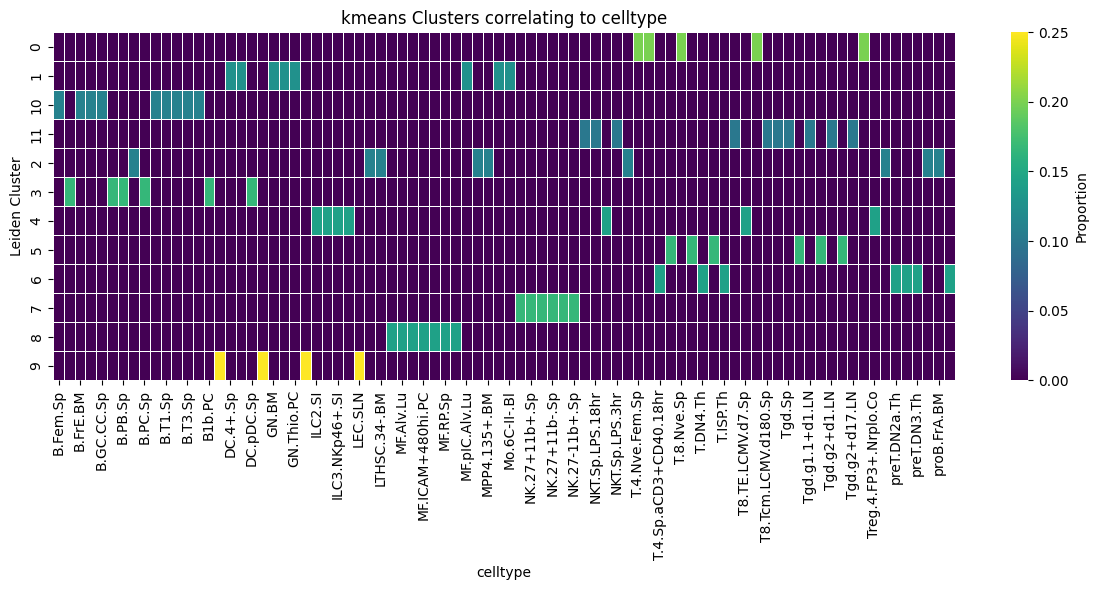

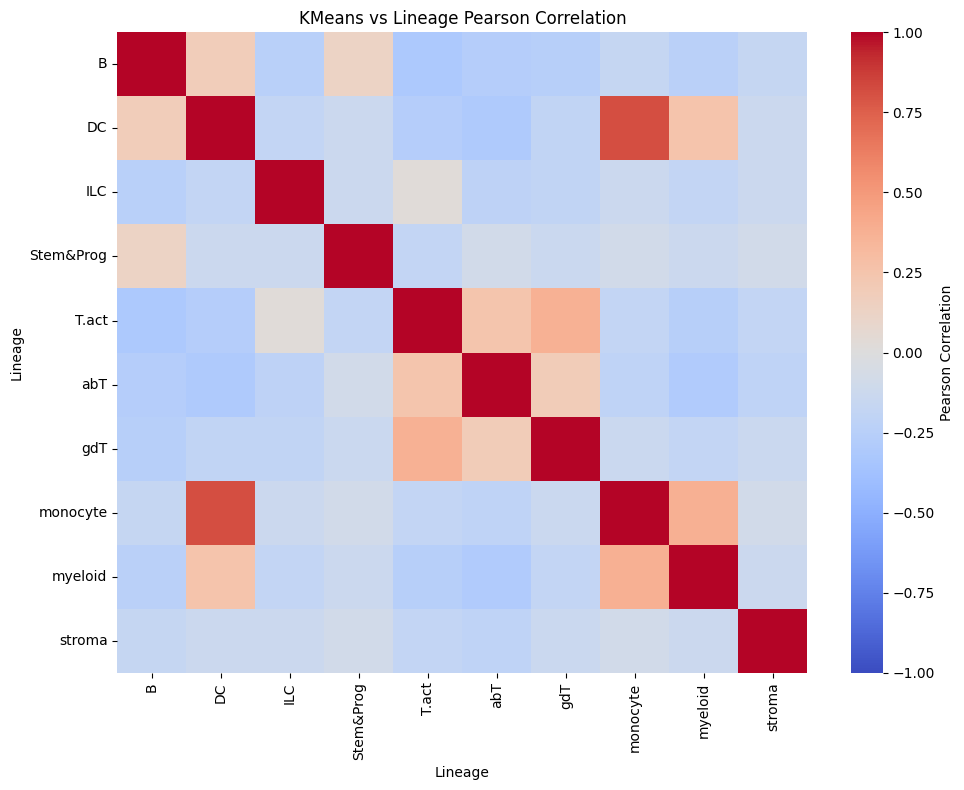

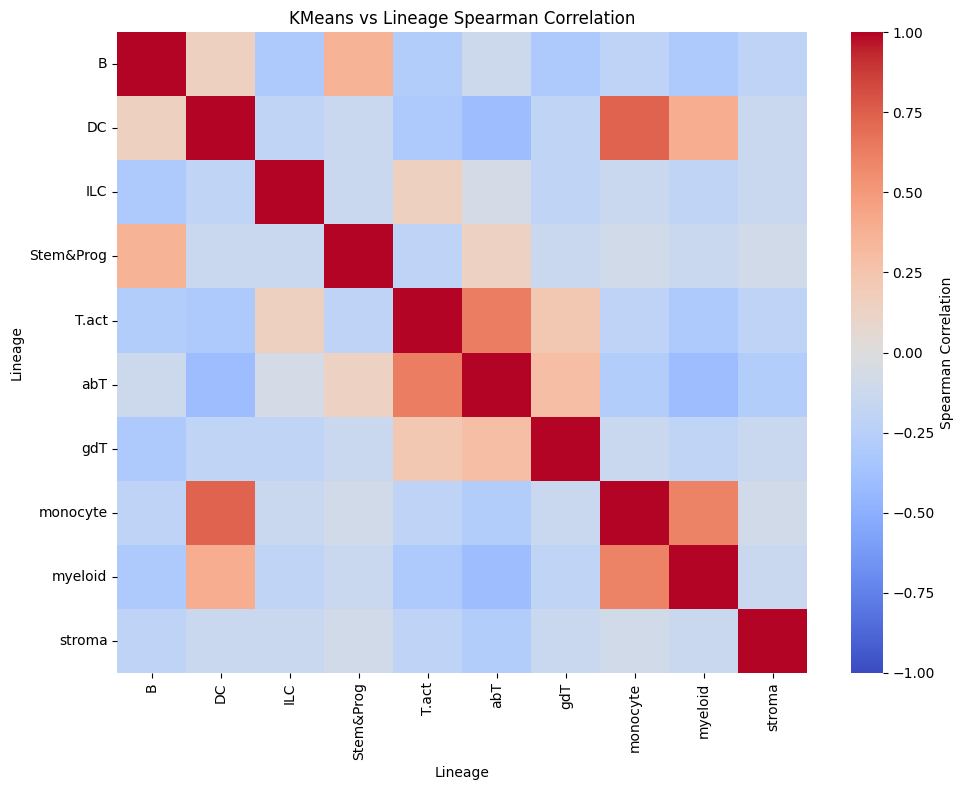

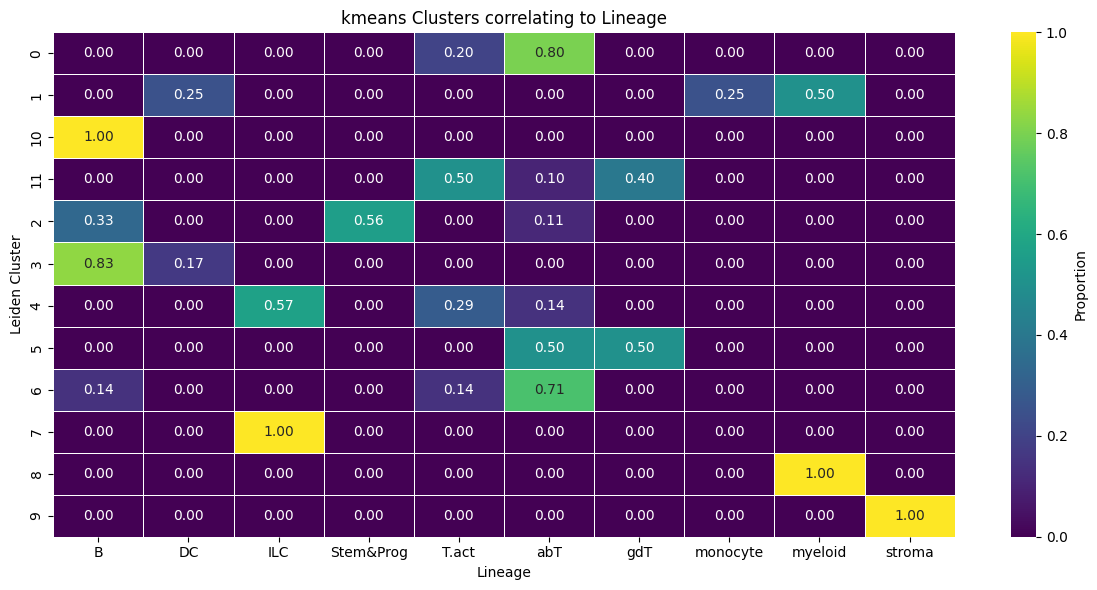

In [11]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
adata = ad.AnnData(X=RNA_seq_T.values)
adata.obs_names = RNA_seq_T.index
adata.obsm["X_umap"] = umap_RNA_prep

sc.pp.neighbors(adata, use_rep="X", n_neighbors=10, random_state=42)
sc.tl.leiden(adata, resolution=1.9)

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].values
umap_RNA_seq["Leiden_Cluster"].to_csv("leiden_clusters.csv")

#spearman & perason correlation
def compute_and_plot_correlations(ct_norm, title_prefix=""):
    import scipy.stats as stats

    pearson_corr = ct_norm.corr(method='pearson')
    spearman_corr = ct_norm.corr(method='spearman')

    # Plot Pearson
    plt.figure(figsize=(10, 8))
    sns.heatmap(pearson_corr, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f",
                cbar_kws={"label": "Pearson Correlation"})
    plt.title(f"{title_prefix} Pearson Correlation")
    plt.tight_layout()
    plt.show()

    # Plot Spearman
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f",
                cbar_kws={"label": "Spearman Correlation"})
    plt.title(f"{title_prefix} Spearman Correlation")
    plt.tight_layout()
    plt.show()
    
    return pearson_corr, spearman_corr


# heatmap correlation leiden clusters and lineage 
qc_path = r"C:\Users\helen\Downloads\datasets\mmc1.xlsx"
qc = pd.read_excel(qc_path, index_col=0)

qc.index = qc.index.str.replace(r"#\d+", "", regex=True)
adata.obs_names = adata.obs_names.str.replace(r"#\d+", "", regex=True)

# Drop duplicate indices to avoid reindex error
qc = qc.loc[~qc.index.duplicated(keep='first')]
adata = adata[~adata.obs_names.duplicated(keep='first')].copy()

common_samples = adata.obs_names.intersection(qc.index)
adata = adata[common_samples].copy()
qc_matched = qc.loc[common_samples]

celltype_to_lineage = qc_matched["Lineage"].to_dict()
adata.obs["Lineage"] = adata.obs_names.map(celltype_to_lineage).fillna("Unknown")

ct = pd.crosstab(adata.obs["leiden"], adata.obs["Lineage"])
ct_norm = ct.div(ct.sum(axis=1), axis=0) 
compute_and_plot_correlations(ct_norm, title_prefix="Leiden vs Lineage")

plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm, cmap="viridis", linewidths=0.5, annot=True, fmt=".2f",cbar_kws={"label": "Proportion"})
plt.title("Leiden Clusters correlating to Lineage")
plt.xlabel("Lineage")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()

# correlation leiden clusters and cell type
adata.obs["CellType"] = qc_matched["CellType"]
ct = pd.crosstab(adata.obs["leiden"], adata.obs["CellType"])
ct_norm = ct.div(ct.sum(axis=1), axis=0) 
compute_and_plot_correlations(ct_norm, title_prefix="Leiden vs CellType")

plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm, cmap="viridis", linewidths=0.5,cbar_kws={"label": "Proportion"})
plt.title("Leiden Clusters correlating to celltype")
plt.xlabel("celltype")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()

#now kmeans
from sklearn.cluster import KMeans

# Prepare DataFrame
umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
umap_RNA_seq["CellType"] = RNA_seq_T.index

# kmeans with 12 clusters (amount cell types)
kmeans12 = KMeans(n_clusters=12, random_state=42)
umap_RNA_seq["kmeans12"] = kmeans12.fit_predict(umap_RNA_prep).astype(str)
adata.obs['kmeans12'] = umap_RNA_seq.loc[adata.obs_names, 'kmeans12']

#kmeans12 vs celltype
ct = pd.crosstab(adata.obs["kmeans12"], adata.obs["CellType"])
ct_norm = ct.div(ct.sum(axis=1), axis=0) 
compute_and_plot_correlations(ct_norm, title_prefix="KMeans vs CellType")

plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm, cmap="viridis", linewidths=0.5,cbar_kws={"label": "Proportion"})
plt.title("kmeans Clusters correlating to celltype")
plt.xlabel("celltype")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()

#kmeans12 vs cell lineage
ct = pd.crosstab(adata.obs["kmeans12"], adata.obs["Lineage"])
ct_norm = ct.div(ct.sum(axis=1), axis=0) 
compute_and_plot_correlations(ct_norm, title_prefix="KMeans vs Lineage")

plt.figure(figsize=(12, 6))
sns.heatmap(ct_norm, cmap="viridis", linewidths=0.5, annot=True, fmt=".2f",cbar_kws={"label": "Proportion"})
plt.title("kmeans Clusters correlating to Lineage")
plt.xlabel("Lineage")
plt.ylabel("Leiden Cluster")
plt.tight_layout()
plt.show()


now we will compare clustering via leiden and kmeans

In [14]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Ensure Leiden cluster assignments are present and as string
if "Leiden_Cluster" not in umap_RNA_seq.columns:
	umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].astype(str).reindex(umap_RNA_seq.index)
else:
	umap_RNA_seq["Leiden_Cluster"] = umap_RNA_seq["Leiden_Cluster"].astype(str)

kmeans5_labels = kmeans5.fit_predict(umap_RNA_prep)
umap_RNA_seq["KMeans_Cluster"] = kmeans5_labels.astype(str)

# Drop rows with NaN in either cluster column
valid = umap_RNA_seq[["Leiden_Cluster", "KMeans_Cluster"]].dropna()
ari = adjusted_rand_score(valid["Leiden_Cluster"], valid["KMeans_Cluster"])
nmi = normalized_mutual_info_score(valid["Leiden_Cluster"], valid["KMeans_Cluster"])

print(f"Adjusted Rand Index (KMeans vs. Leiden): {ari:.3f}")
print(f"Normalized Mutual Information (KMeans vs. Leiden): {nmi:.3f}")

Adjusted Rand Index (KMeans vs. Leiden): 0.576
Normalized Mutual Information (KMeans vs. Leiden): 0.723


now were correlating cell lineage to genes in a heatmap with a dendogram

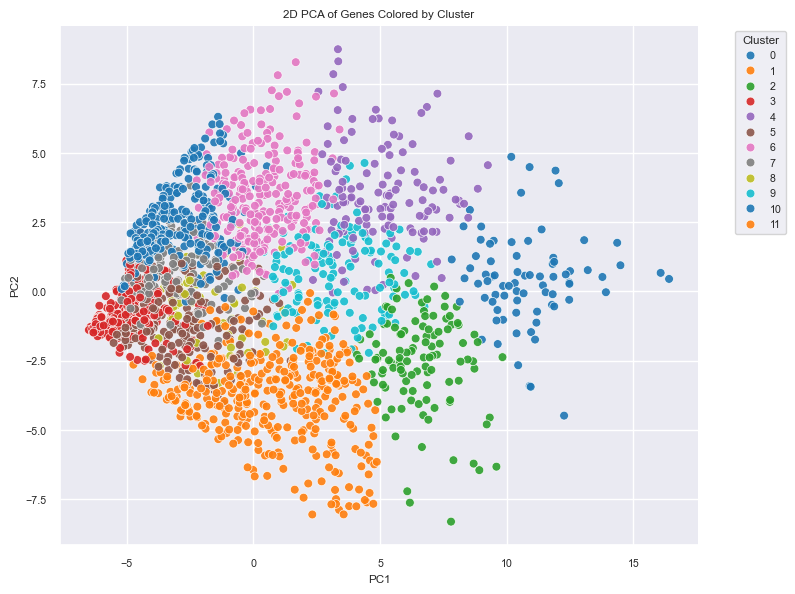

c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


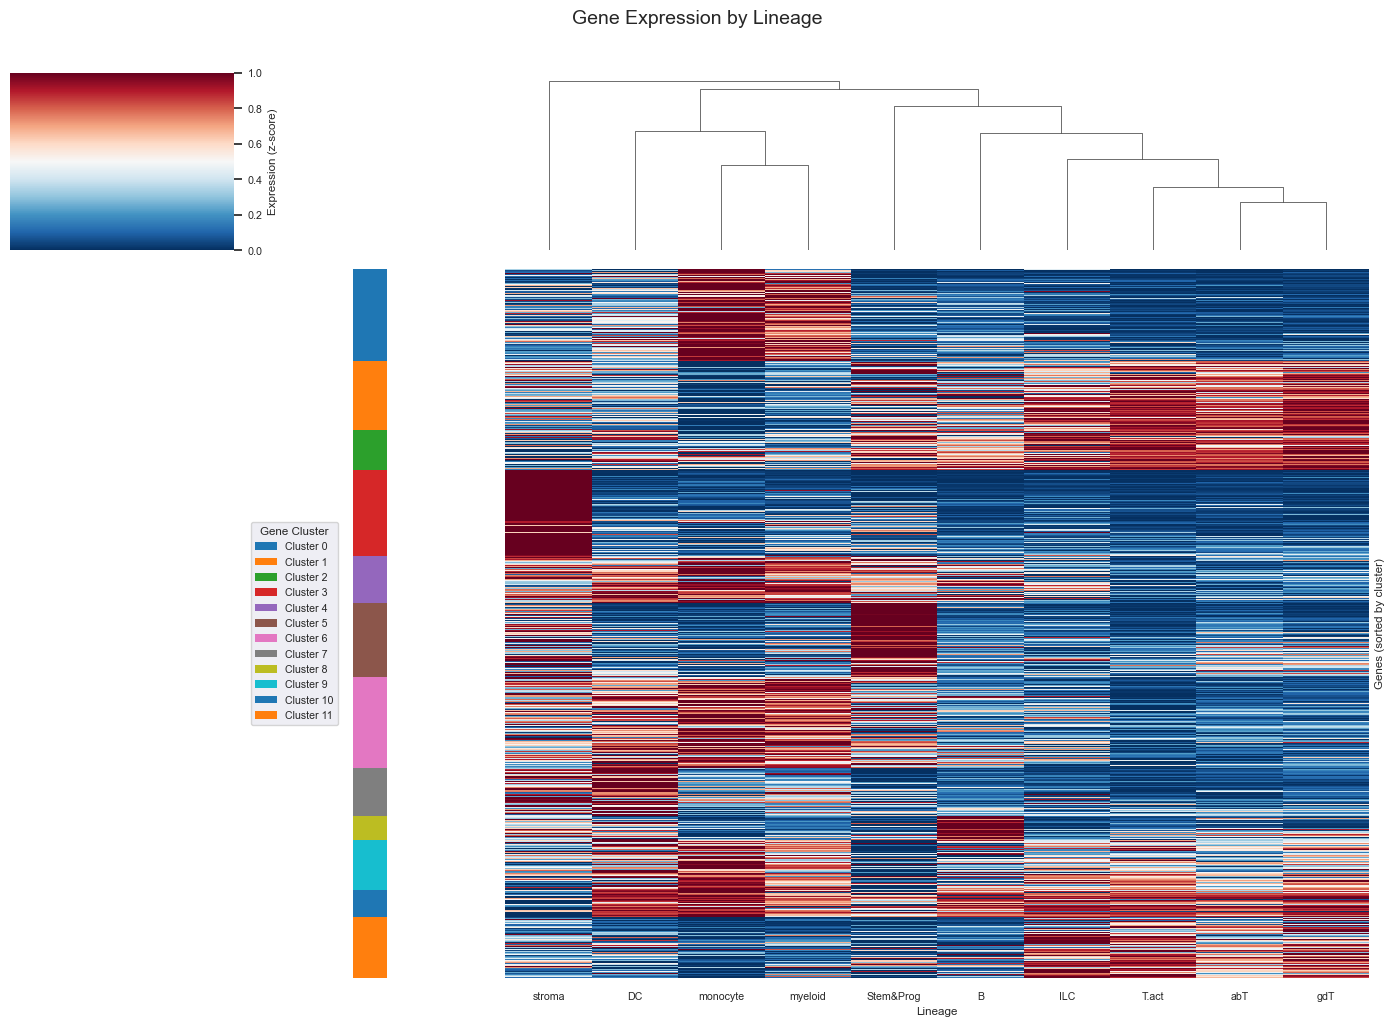

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def get_lineage_expression(RNA_seq_log, adata, top_n_genes=2000):
    common_samples = RNA_seq_log.index.intersection(adata.obs_names)
    if len(common_samples) == 0:
        raise ValueError("No common samples between RNA_seq_log and adata.obs_names.")
    RNA_df = RNA_seq_log.loc[common_samples]
    lineage_info = adata.obs.loc[common_samples, "Lineage"]
    lineage_expr = RNA_df.groupby(lineage_info).mean().T
    top_genes = lineage_expr.var(axis=1).nlargest(top_n_genes).index
    return lineage_expr.loc[top_genes]

def cluster_and_pca(lineage_expr, n_gene_clusters=12, n_pca_components=10):
    # PCA
    pca = PCA(n_components=n_pca_components)
    lineage_expr_pca = pd.DataFrame(
        pca.fit_transform(lineage_expr),
        index=lineage_expr.index,
        columns=[f"PC{i+1}" for i in range(n_pca_components)]
    )
    # KMeans
    kmeans = KMeans(n_clusters=n_gene_clusters, random_state=42)
    gene_clusters = kmeans.fit_predict(lineage_expr)
    gene_cluster_series = pd.Series(gene_clusters, index=lineage_expr.index)
    return lineage_expr_pca, gene_cluster_series

def plot_pca_clusters(lineage_expr, gene_cluster_series, cluster_palette):
    # 2D PCA
    pca_2d = PCA(n_components=2)
    pca_coords_2d = pca_2d.fit_transform(lineage_expr)
    pca_df_2d = pd.DataFrame(pca_coords_2d, index=lineage_expr.index, columns=["PC1", "PC2"])
    pca_df_2d["Cluster"] = gene_cluster_series
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=pca_df_2d, x="PC1", y="PC2", hue="Cluster",
        palette=cluster_palette, legend="full", s=40, alpha=0.9
    )
    plt.title("2D PCA of Genes Colored by Cluster")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine()
    plt.tight_layout()
    plt.show()

def plot_clustermap(lineage_expr, gene_cluster_series, lineage_expr_pca, cluster_palette):
    gene_cluster_df = gene_cluster_series.rename("Cluster").to_frame()
    gene_cluster_with_pc1 = gene_cluster_df.join(lineage_expr_pca["PC1"])
    sorted_genes = gene_cluster_with_pc1.sort_values(["Cluster", "PC1"]).index
    lineage_expr_sorted = lineage_expr.loc[sorted_genes]
    row_colors_sorted = gene_cluster_series.loc[sorted_genes].map(cluster_palette)
    sns.set(font_scale=0.7)
    g = sns.clustermap(
        lineage_expr_sorted,
        row_colors=row_colors_sorted,
        cmap="RdBu_r",
        standard_scale=0,
        figsize=(14, 10),
        col_cluster=True,
        row_cluster=False,
        yticklabels=False,
        xticklabels=True,
        cbar_kws={"label": "Expression (z-score)"}
    )
    g.ax_heatmap.set_ylabel("Genes (sorted by cluster)")
    g.ax_heatmap.set_xlabel("Lineage")
    g.fig.suptitle("Gene Expression by Lineage", fontsize=14, y=1.02)
    # Custom legend for clusters
    for cluster_id, color in cluster_palette.items():
        g.ax_row_dendrogram.bar(0, 0, color=color, label=f"Cluster {cluster_id}", linewidth=0)
    g.ax_row_dendrogram.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title="Gene Cluster")
    plt.tight_layout()
    plt.show()

# Main workflow
lineage_expr = get_lineage_expression(RNA_seq_log, adata, top_n_genes=2000)
lineage_expr_pca, gene_cluster_series = cluster_and_pca(lineage_expr, n_gene_clusters=n_gene_clusters, n_pca_components=n_pca_components)
cluster_colors = sns.color_palette("tab10", n_colors=n_gene_clusters)
cluster_palette = dict(zip(range(n_gene_clusters), cluster_colors))

plot_pca_clusters(lineage_expr, gene_cluster_series, cluster_palette)
plot_clustermap(lineage_expr, gene_cluster_series, lineage_expr_pca, cluster_palette)
